# Overview

Predict future values of the input series. These future timesteps are called `Horizon`. When the number of future timesteps to predict is > 1, it is called a `Multi-horizon` problem.

## Import

In [2]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.split import temporal_train_test_split

## Data

```{image} ../../images/forecasting.jpg
:alt: forecasting
:width: 70%
:align: center
```

Load the airline univariate time series dataset. The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960. Dimensionality: univariate Series length: 144 Frequency: Monthly Number of cases: 1 This data shows an increasing trend, non-constant (increasing) variance and periodic, seasonal patterns.

In [3]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity

## Train

In [4]:
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mean_absolute_percentage_error(y_test, y_pred)

0.08174636612807698

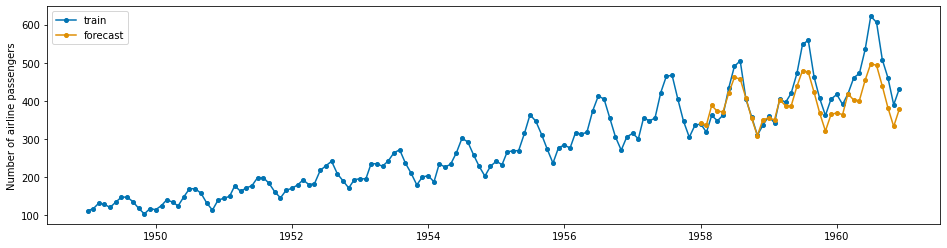

In [5]:
from sktime.utils.plotting import plot_series

fig, ax = plot_series(y, y_pred, labels=["train", "forecast"])